importing modules

In [36]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import joblib
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

extract data 

In [6]:
df=pd.read_excel('data.xlsx')

df.head()

N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

EDA

In [7]:
# Understand the structure of the dataset
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None


In [8]:
df.describe()

N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117

In [9]:
# Group data by 'label' 
stat_summary = df.groupby('label').describe()
# statistical summary for each crop
print(stat_summary)

                 N                                                          \
             count    mean        std    min     25%    50%     75%    max   
label                                                                        
apple        100.0   20.80  11.863704    0.0   10.00   24.0   30.00   40.0   
banana       100.0  100.23  11.107241   80.0   92.00  100.5  108.25  120.0   
blackgram    100.0   40.02  12.664258   20.0   28.75   41.0   52.00   60.0   
chickpea     100.0   40.09  12.150649   20.0   30.00   39.0   52.00   60.0   
coconut      100.0   21.98  11.761931    0.0   13.75   24.0   31.00   40.0   
coffee       100.0  101.20  12.345203   80.0   89.00  103.0  112.00  120.0   
cotton       100.0  117.77  11.628817  100.0  107.75  117.0  127.50  140.0   
grapes       100.0   23.18  12.466829    0.0   11.75   24.0   35.00   40.0   
jute         100.0   78.40  10.968274   60.0   70.00   78.0   88.25  100.0   
kidneybeans  100.0   20.75  10.834266    0.0   11.75   22.0   28

In [10]:
# Group data by 'label' and calculate mean values for each numerical feature
mean_values = df.groupby('label').mean()
print(mean_values)


                  N       P       K  temperature   humidity        ph  \
label                                                                   
apple         20.80  134.22  199.89    22.630942  92.333383  5.929663   
banana       100.23   82.01   50.05    27.376798  80.358123  5.983893   
blackgram     40.02   67.47   19.24    29.973340  65.118426  7.133952   
chickpea      40.09   67.79   79.92    18.872847  16.860439  7.336957   
coconut       21.98   16.93   30.59    27.409892  94.844272  5.976562   
coffee       101.20   28.74   29.94    25.540477  58.869846  6.790308   
cotton       117.77   46.24   19.56    23.988958  79.843474  6.912675   
grapes        23.18  132.53  200.11    23.849575  81.875228  6.025937   
jute          78.40   46.86   39.99    24.958376  79.639864  6.732778   
kidneybeans   20.75   67.54   20.05    20.115085  21.605357  5.749411   
lentil        18.77   68.36   19.41    24.509052  64.804785  6.927932   
maize         77.76   48.44   19.79    22.389204  6

<Figure size 1200x800 with 0 Axes>

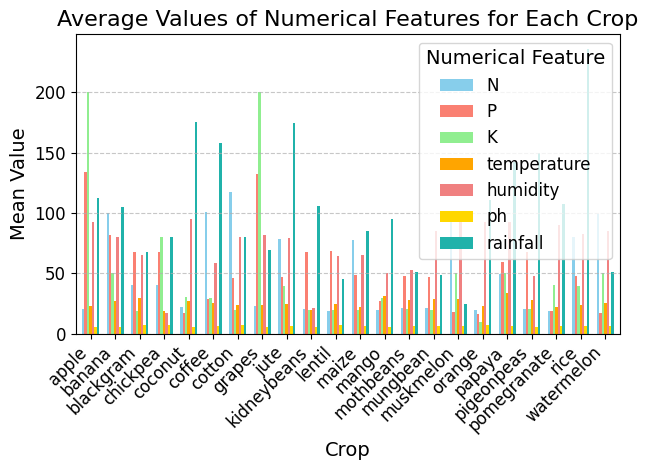

In [11]:
# Group data by 'label' and calculate mean values for each numerical feature
mean_values = df.groupby('label').mean()

# Plot mean values using Matplotlib
plt.figure(figsize=(12, 8))
mean_values.plot(kind='bar', width=0.7, color=['skyblue', 'salmon', 'lightgreen', 'orange', 'lightcoral', 'gold', 'lightseagreen'])
plt.title('Average Values of Numerical Features for Each Crop', fontsize=16)
plt.xlabel('Crop', fontsize=14)
plt.ylabel('Mean Value', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Numerical Feature', fontsize=12, title_fontsize=14)
plt.tight_layout()
plt.show()

C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

Text(0.5, 1.0, 'Pairplot')

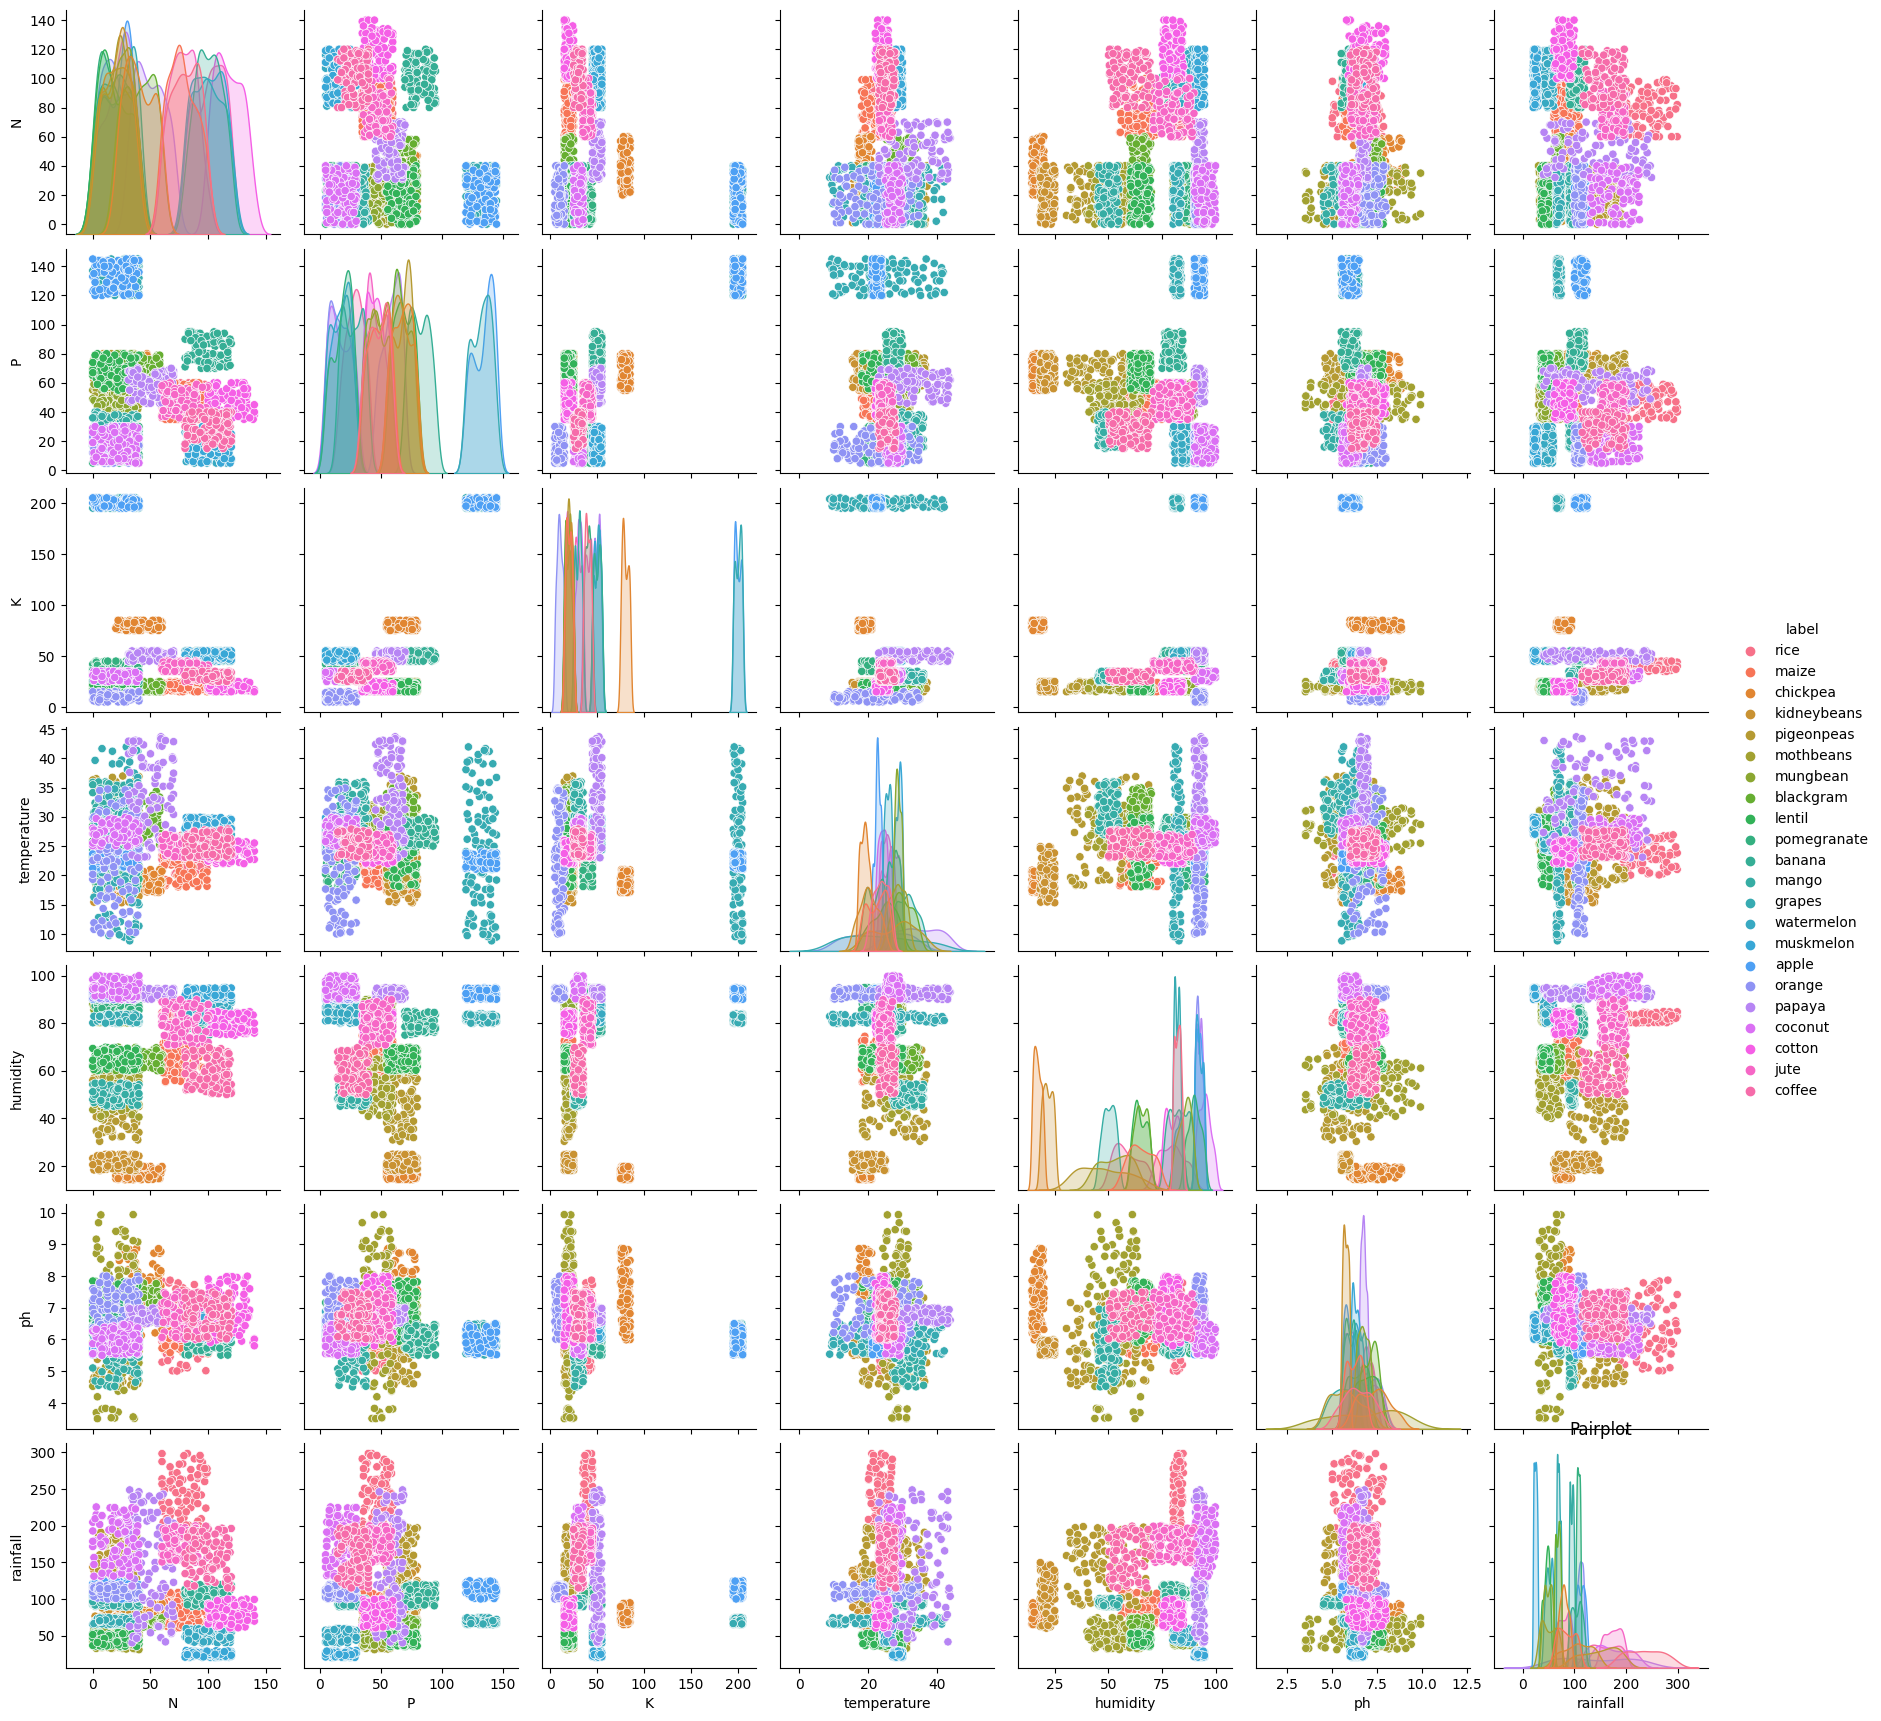

In [40]:
# Pairplot to visualize relationships between numerical features
sns.pairplot(df, hue='label')
plt.title('Pairplot')

         few conditions to check 

In [12]:
# Filter crops based on conditions
summer_crops = df[(df['temperature'] > 30) & (df['humidity'] > 50)]

# Display crops suitable for summer season
print("Crops suitable for summer season:")
print(summer_crops['label'].unique())

Crops suitable for summer season:
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']


In [13]:
# Filter crops based on conditions
winter_crops = df[(df['temperature'] < 20) & (df['humidity'] > 30)]

# Display crops suitable for summer season
print("Crops suitable for winter season:")
print(winter_crops['label'].unique())

Crops suitable for winter season:
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']


In [14]:
# Filter crops based on conditions
rainy_crops = df[(df['rainfall'] > 200) & (df['humidity'] > 30)]

# Display crops suitable for summer season
print("Crops suitable for winter season:")
print(winter_crops['label'].unique())

Crops suitable for winter season:
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']


        preprocessing

In [15]:
df.head()

N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

In [16]:
# Separate numerical features from the dataset
numerical_features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
X = df[numerical_features]



In [17]:
# Scale the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [18]:
# Create a new DataFrame with scaled features
df_scaled = pd.DataFrame(X_scaled, columns=numerical_features)

# Concatenate the scaled features with the label column
df_scaled['label'] = df['label']

# Display
print("Preprocessed data:")
print(df_scaled)

Preprocessed data:
             N         P         K  temperature  humidity        ph  rainfall  \
0     1.068797 -0.344551 -0.101688    -0.935587  0.472666  0.043302  1.810361   
1     0.933329  0.140616 -0.141185    -0.759646  0.397051  0.734873  2.242058   
2     0.255986  0.049647 -0.081939    -0.515898  0.486954  1.771510  2.921066   
3     0.635298 -0.556811 -0.160933     0.172807  0.389805  0.660308  2.537048   
4     0.743673 -0.344551 -0.121436    -1.083647  0.454792  1.497868  2.898373   
...        ...       ...       ...          ...       ...       ...       ...   
2195  1.529390 -0.587134 -0.318922     0.228814 -0.227709  0.401395  1.352437   
2196  1.312641 -1.163269 -0.417666     0.355720 -0.666947 -0.494413  0.445183   
2197  1.827421 -0.617457 -0.358420    -0.293218 -0.191235 -0.138120  1.271418   
2198  1.800327 -0.647780 -0.279425     0.129612 -0.869518  0.373904  0.431545   
2199  1.448109 -1.072300 -0.358420    -0.397667 -0.498020  0.401096  0.682005   

       l

C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

<Figure size 1000x800 with 0 Axes>

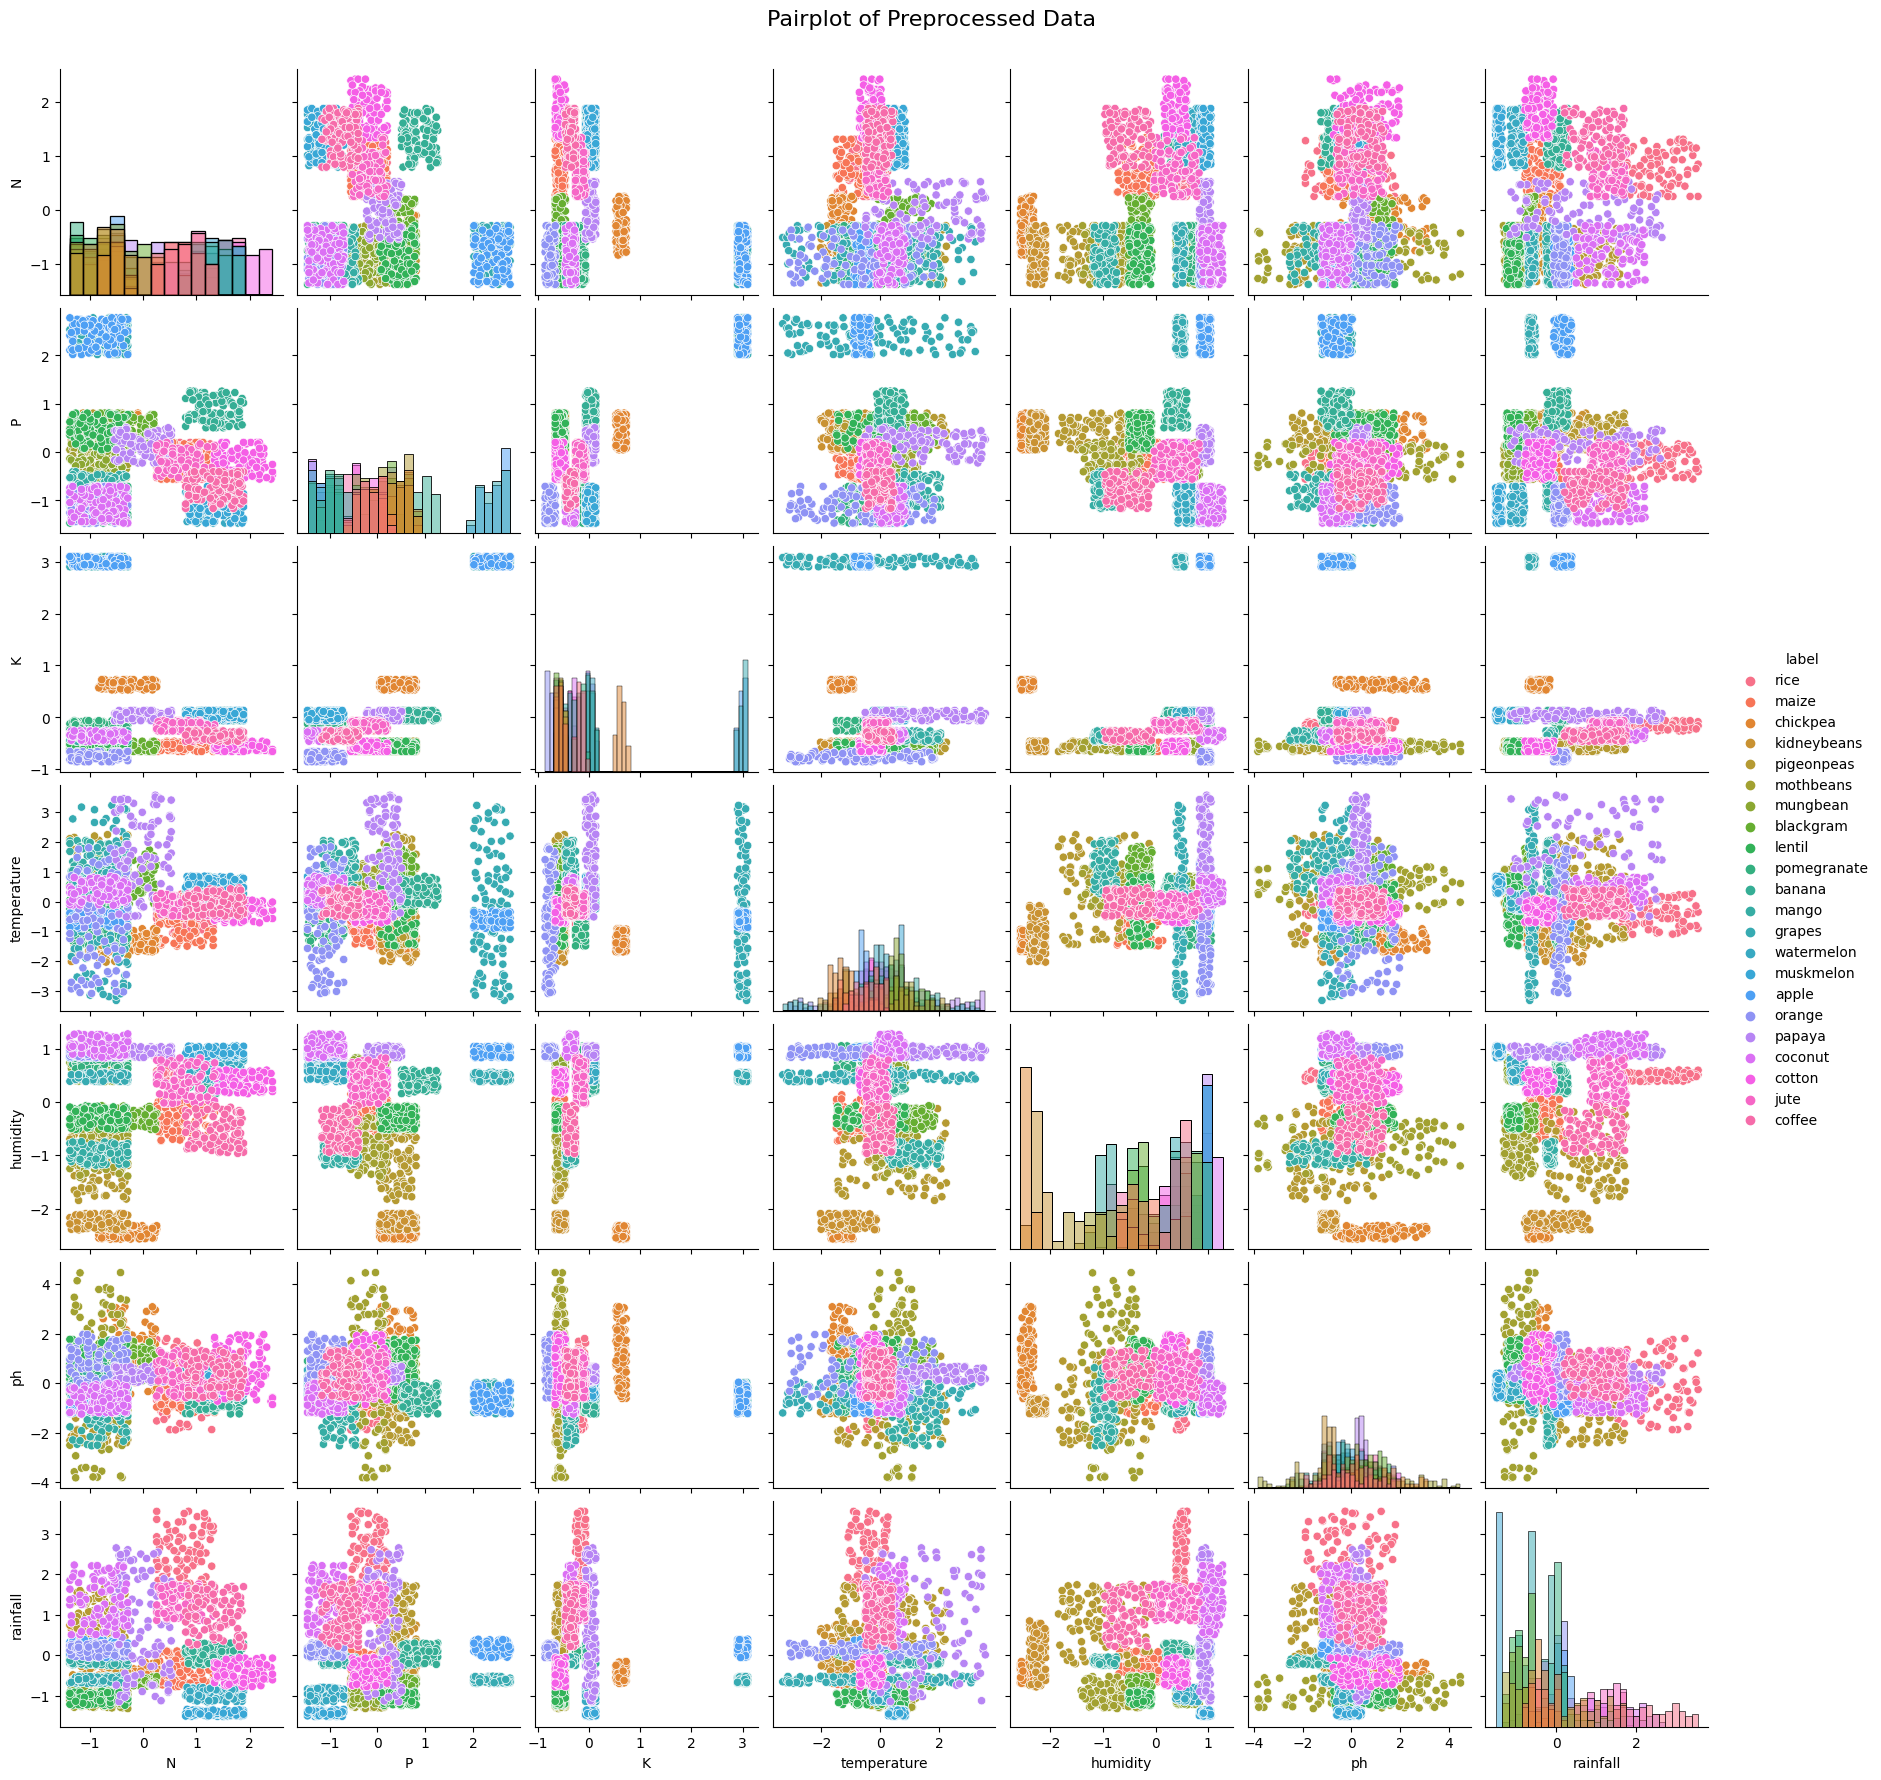

In [19]:
# Visualize the preprocessed data using pairplot
plt.figure(figsize=(10, 8))
sns.pairplot(df_scaled, hue='label', diag_kind='hist')
plt.suptitle('Pairplot of Preprocessed Data', y=1.02, fontsize=16)
plt.show()

        Kmeans

C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The 

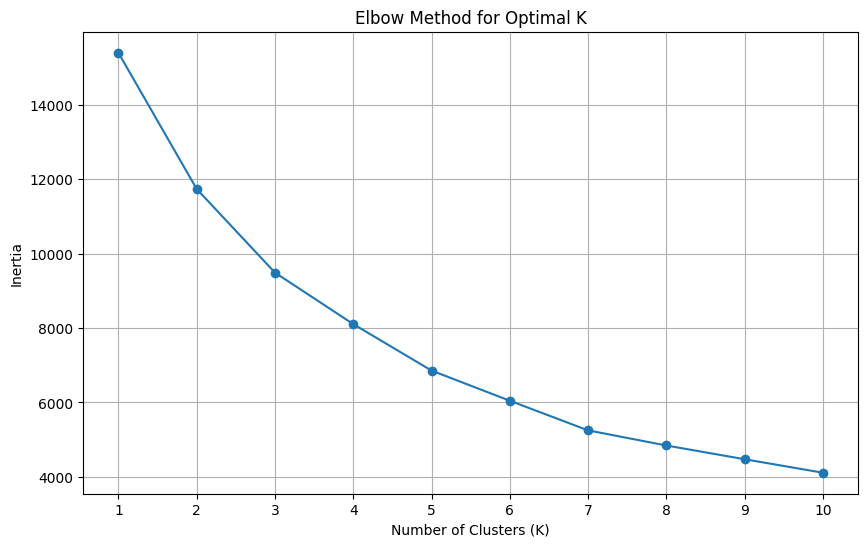

In [20]:

# Apply elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the inertia values
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()



In [21]:
df_scaled

N         P         K  temperature  humidity        ph  rainfall  \
0     1.068797 -0.344551 -0.101688    -0.935587  0.472666  0.043302  1.810361   
1     0.933329  0.140616 -0.141185    -0.759646  0.397051  0.734873  2.242058   
2     0.255986  0.049647 -0.081939    -0.515898  0.486954  1.771510  2.921066   
3     0.635298 -0.556811 -0.160933     0.172807  0.389805  0.660308  2.537048   
4     0.743673 -0.344551 -0.121436    -1.083647  0.454792  1.497868  2.898373   
...        ...       ...       ...          ...       ...       ...       ...   
2195  1.529390 -0.587134 -0.318922     0.228814 -0.227709  0.401395  1.352437   
2196  1.312641 -1.163269 -0.417666     0.355720 -0.666947 -0.494413  0.445183   
2197  1.827421 -0.617457 -0.358420    -0.293218 -0.191235 -0.138120  1.271418   
2198  1.800327 -0.647780 -0.279425     0.129612 -0.869518  0.373904  0.431545   
2199  1.448109 -1.072300 -0.358420    -0.397667 -0.498020  0.401096  0.682005   

       label  
0       rice  
1       rice  
2       rice  
3       rice  
4       rice  
...      ...  
2195  coffee  
2196  coffee  
2197  coffee  
2198  coffee  
2199  coffee  

[2200 rows x 8 columns]

SILHOUTTE SCORE TO TEST THE OPTIMAL K APART FROM ELBOW METHOD

In [23]:
X = df.drop(columns=['label'])  # Features

# Calculate silhouette score for different values of K
silhouette_scores = []
for k in range(2, 11):  # Trying K values from 2 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append((k, silhouette_avg))

# Find the K with the highest silhouette score
best_k, best_silhouette_score = max(silhouette_scores, key=lambda x: x[1])

print(f"Ideal number of clusters (K): {best_k}")
print(f"Silhouette score: {best_silhouette_score}")

C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The 

Ideal number of clusters (K): 2
Silhouette score: 0.5451227886773359


making the another column for clusters

In [24]:
# Choose the optimal number of clusters (K)
optimal_k = 2 

# Apply K-means clustering with optimal K
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_scaled)

# Assign cluster labels to the original data
df['cluster'] = kmeans.labels_

# Display the clustering results
print("Clustering Results:")
print(df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'cluster']])

Clustering Results:
        N   P   K  temperature   humidity        ph    rainfall  cluster
0      90  42  43    20.879744  82.002744  6.502985  202.935536        0
1      85  58  41    21.770462  80.319644  7.038096  226.655537        0
2      60  55  44    23.004459  82.320763  7.840207  263.964248        0
3      74  35  40    26.491096  80.158363  6.980401  242.864034        0
4      78  42  42    20.130175  81.604873  7.628473  262.717340        0
...   ...  ..  ..          ...        ...       ...         ...      ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507        0
2196   99  15  27    27.417112  56.636362  6.086922  127.924610        0
2197  118  33  30    24.131797  67.225123  6.362608  173.322839        0
2198  117  32  34    26.272418  52.127394  6.758793  127.175293        0
2199  104  18  30    23.603016  60.396475  6.779833  140.937041        0

[2200 rows x 8 columns]


C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


VISUALIZE AFTER SCALING

C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be re

Cluster Centers:
          N         P         K  temperature  humidity        ph  rainfall
0  0.077385 -0.242620 -0.299885     0.046932 -0.070186  0.063544  0.022441
1 -0.773845  2.426203  2.998848    -0.469321  0.701860 -0.635441 -0.224409


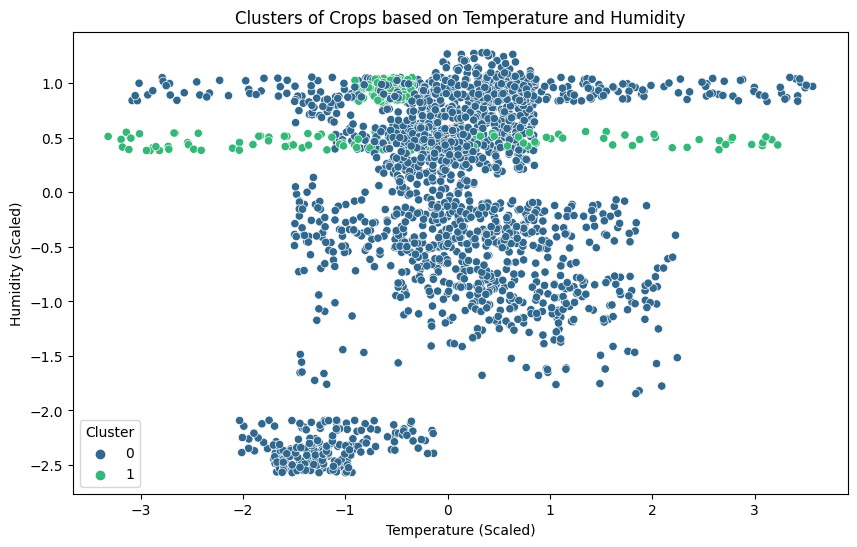

In [25]:
# Perform K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
kmeans.fit(X_scaled)

# Add cluster labels to the dataset
df_scaled['cluster'] = kmeans.labels_

# Display the cluster centers
print("Cluster Centers:")
print(pd.DataFrame(kmeans.cluster_centers_, columns=numerical_features))

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temperature', y='humidity', hue='cluster', data=df_scaled, palette='viridis')
plt.title('Clusters of Crops based on Temperature and Humidity')
plt.xlabel('Temperature (Scaled)')
plt.ylabel('Humidity (Scaled)')
plt.legend(title='Cluster')
plt.show()


INORDER TO IMPROVE THE VISUALIZATION WE'LL USE PCA 

C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be re

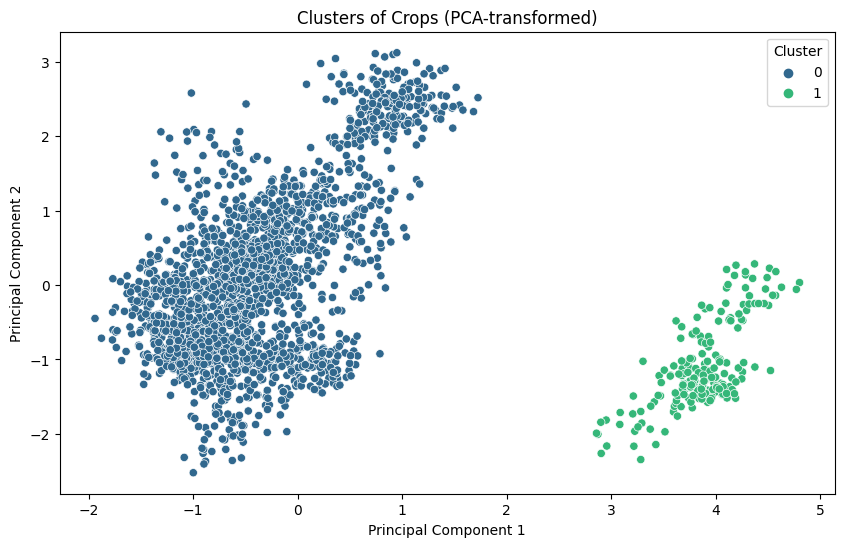

In [26]:


# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Fit KMeans clustering with the optimal number of clusters on the PCA-transformed data
kmeans_pca = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
kmeans_pca.fit(X_pca)

# Add cluster labels to the dataset
df_scaled['cluster_pca'] = kmeans_pca.labels_

# Visualize the clusters in the PCA-transformed space
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue='cluster_pca', data=df_scaled, palette='viridis')
plt.title('Clusters of Crops (PCA-transformed)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


In [27]:
df['cluster'].unique()

array([0, 1])

In [28]:
df=df.drop(columns=['cluster'])

In [29]:
df_scaled

N         P         K  temperature  humidity        ph  rainfall  \
0     1.068797 -0.344551 -0.101688    -0.935587  0.472666  0.043302  1.810361   
1     0.933329  0.140616 -0.141185    -0.759646  0.397051  0.734873  2.242058   
2     0.255986  0.049647 -0.081939    -0.515898  0.486954  1.771510  2.921066   
3     0.635298 -0.556811 -0.160933     0.172807  0.389805  0.660308  2.537048   
4     0.743673 -0.344551 -0.121436    -1.083647  0.454792  1.497868  2.898373   
...        ...       ...       ...          ...       ...       ...       ...   
2195  1.529390 -0.587134 -0.318922     0.228814 -0.227709  0.401395  1.352437   
2196  1.312641 -1.163269 -0.417666     0.355720 -0.666947 -0.494413  0.445183   
2197  1.827421 -0.617457 -0.358420    -0.293218 -0.191235 -0.138120  1.271418   
2198  1.800327 -0.647780 -0.279425     0.129612 -0.869518  0.373904  0.431545   
2199  1.448109 -1.072300 -0.358420    -0.397667 -0.498020  0.401096  0.682005   

       label  cluster  cluster_pca  
0       rice        0            0  
1       rice        0            0  
2       rice        0            0  
3       rice        0            0  
4       rice        0            0  
...      ...      ...          ...  
2195  coffee        0            0  
2196  coffee        0            0  
2197  coffee        0            0  
2198  coffee        0            0  
2199  coffee        0            0  

[2200 rows x 10 columns]

In [32]:
df=df_scaled.drop(columns=['cluster','cluster_pca'])

        USING RANDOM FOREST CLASSIFIER FOR CLASSIFICATION

In [42]:
# Data Preprocessing
X = df.drop(columns=['label'])  # Features
y_classification = df['label']  # Target for classification

# Split the data into training and testing sets for classification
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_classification, test_size=0.2, random_state=42)

# Classification Model (Random Forest)
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the pipeline 
pipeline.fit(X_train, y_train)

# Evaluate classification model
accuracy = pipeline.score(X_test, y_test)
print("Classification Model Accuracy:", accuracy)

# Save the pipeline object for deployment
joblib.dump(pipeline, 'classification_pipeline.pkl')


Classification Model Accuracy: 0.9931818181818182


['classification_pipeline.pkl']

MANUAL CHECK 

MANUAL CHECK OF CLASSIFICATION MODEL

In [38]:
# Prediction using the trained models
new_data_point = pd.DataFrame({
    'N': [80],
    'P': [90],
    'K': [50],
    'temperature': [20],
    'humidity': [50],
    'ph': [8],
    'rainfall': [100]
})
# Encode categorical variables if any
new_data_point_encoded = pd.get_dummies(new_data_point)  

# Classification prediction
crop_prediction = clf.predict(new_data_point_encoded)



print("Crop Prediction:", crop_prediction)


Crop Prediction: ['apple']


C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
